<a href="https://colab.research.google.com/github/robgon-art/open-clip/blob/main/Index_LOC_Photos_with_OpenCLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index Library of Congress Photos with OpenCLIP

This is a notebook that shows how to download and run OpenCLIP models to create an index for searching images.</br></br>
Note that you will need an Flickr API Key and Secret to run this notebook.

In [ ]:
!nvidia-smi

Sat Mar  4 17:41:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install open_clip_torch
!pip install flickrapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 394.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 whic

In [ ]:
from flickrapi.core import FlickrAPI
import flickrapi
import os
import urllib.request
import time

# Replace with your own Flickr API key and secret
FLICKR_API_KEY = "Your API Key"
FLICKR_API_SECRET = "Your API Secret"

# Authenticate with the Flickr API
flickr = flickrapi.FlickrAPI(FLICKR_API_KEY, FLICKR_API_SECRET, format='parsed-json')

# Replace with a user ID
user_id = "library_of_congress"

# Create a folder to save the photos
folder = "photos"
if not os.path.exists(folder):
  os.makedirs(folder)

# Construct the URLs to the photos
photo_urls = []

page = 1
get_out = False
while True:
  # Retrieve the list of photos
  photos = flickr.photos.search(user_id=user_id, per_page=500, page=page)

  for photo in photos['photos']['photo']:
    photo_url = f"https://live.staticflickr.com/{photo['server']}/{photo['id']}_{photo['secret']}.jpg"

    if photo_url in photo_urls:
      get_out = True
      break

    photo_urls.append(photo_url)
    caption = photo["title"]
    caption = caption.replace("(LOC)", "").replace("[", "").replace("]","").strip()

  if get_out:
    break
  page += 1

  # if page > 4:
  #   break

  print(page, len(photo_urls))

  if page%8 == 0:
    time.sleep(5)

print(len(photo_urls))

2 500
3 1000
4 1500
5 2000
6 2500
7 3000
8 3500
9 4000
10 4500
11 5000
12 5500
13 6000
14 6500
15 7000
16 7500
17 8000
18 8500
19 9000
20 9500
21 10000
22 10500
23 11000
24 11500
25 12000
26 12500
27 13000
28 13500
29 14000
30 14500
31 15000
32 15500
33 16000
34 16500
35 17000
36 17500
37 18000
38 18500
39 19000
40 19500
41 20000
42 20500
43 21000
44 21500
45 22000
46 22500
47 23000
48 23500
49 24000
50 24500
51 25000
52 25500
53 26000
54 26500
55 27000
56 27500
57 28000
58 28500
59 29000
60 29500
61 30000
62 30500
63 31000
64 31500
65 32000
66 32500
67 33000
68 33500
69 34000
70 34500
71 35000
72 35500
73 36000
74 36500
75 37000
76 37500
77 38000
78 38500
79 39000
80 39500
81 40000
82 40500
83 41000
84 41216
41216


In [ ]:
import urllib.request
import os
import threading

global_urls = []

def download_photos(start, end, photo_urls, folder, path_names):
    for i in range(start, end):
        url = photo_urls[i]
        file_name = url.split("/")[-1]
        path_name = os.path.join(folder, file_name)
        urllib.request.urlretrieve(url, path_name)
        path_names.append(path_name)
        global_urls.append(url)

    print(f"Downloaded {end-start} photos.")

folder = "photos" # Folder to save the downloaded photos
path_names = []

threads = []
num_threads = 8
chunk_size = len(photo_urls) // num_threads

for i in range(num_threads):
    start = i * chunk_size
    end = start + chunk_size if i < num_threads - 1 else len(photo_urls)
    t = threading.Thread(target=download_photos, args=(start, end, photo_urls, folder, path_names))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

print("Downloaded all photos.")

Downloaded 5152 photos.
Downloaded 5152 photos.
Downloaded 5152 photos.
Downloaded 5152 photos.
Downloaded 5152 photos.
Downloaded 5152 photos.
Downloaded 5152 photos.
Downloaded 5152 photos.
Downloaded all photos.


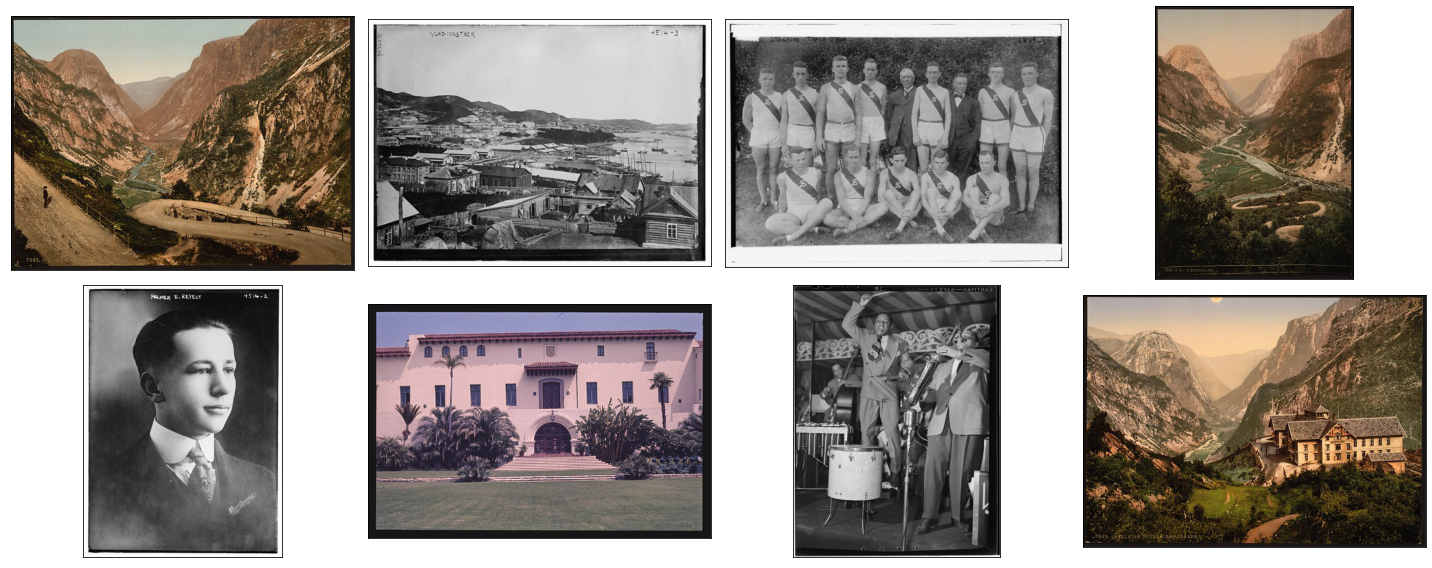

In [ ]:
import matplotlib.pyplot as plt
import skimage
from PIL import Image
import textwrap

plt.figure(figsize=(20, 8))
i=0
for path_name in path_names[:8]:
  image = Image.open(path_name).convert("RGB")
  plt.subplot(2, 4, i + 1)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  i += 1

plt.tight_layout()

In [ ]:
import open_clip
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_e16')
model.cuda().eval()

CLIP(
  (visual): VisionTransformer(
    (patchnorm_pre_ln): Identity()
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0): ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
        (1): ResidualAttentionBlock(
          (l

In [ ]:
print(len(path_names))

41216


In [ ]:
images = []
for i, path_name in enumerate(path_names):
  image = Image.open(path_name).convert("RGB")
  images.append(preprocess(image))
  if i%100 == 0:
    print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
import torch
import numpy as np

batch_size = 2048  # Set the batch size
image_features = []
with torch.no_grad():
  for i in range(0, len(images), batch_size):
    batch_images = images[i:i+batch_size]
    image_input = torch.tensor(np.stack(batch_images)).cuda()
    batch_features = model.encode_image(image_input).float()
    image_features.append(batch_features)

image_features = torch.cat(image_features)
image_features /= image_features.norm(dim=-1, keepdim=True)
print(image_features.shape)

torch.Size([41216, 512])


In [ ]:
print(global_urls[:3])

['https://live.staticflickr.com/1091/3174186405_4654a14ae4.jpg', 'https://live.staticflickr.com/1566/25073678794_25b3a07760.jpg', 'https://live.staticflickr.com/7452/12678837593_4ffcac770d.jpg']


In [ ]:
search_phrase = "woman on brick stairs holding a puppy"

from open_clip import tokenizer
text_tokens = tokenizer.tokenize(search_phrase).cuda()
with torch.no_grad():
  text_features = model.encode_text(text_tokens).float()
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
print(similarity.shape)

(1, 41216)


In [ ]:
def get_items_with_scores(scores, items, n=8):
  sorted_items = sorted(zip(scores, items), reverse=True)
  top_items_with_scores = [(item, score) for score, item in sorted_items[:n]]
  return top_items_with_scores

In [ ]:
print(list(similarity.squeeze()[:3]))

[0.074849516, 0.04314703, 0.08437123]


In [ ]:
top_items_with_scores = get_items_with_scores(list(similarity.squeeze()), path_names, 8)
for p, s in top_items_with_scores:
  print(p, s)

photos/52638969985_cf44c9ed90.jpg 0.38491878
photos/27728464755_642558d269.jpg 0.36633104
photos/51422266479_fbe7334d26.jpg 0.34117168
photos/4606571236_2e4ddb1f3e.jpg 0.33919817
photos/43300650480_3fa30a8d1f.jpg 0.33802772
photos/2478431814_d1b0831f40.jpg 0.33703828
photos/9423354700_83206b624b.jpg 0.33053797
photos/45517210292_59af7df33d.jpg 0.33007059


woman on brick stairs holding a puppy


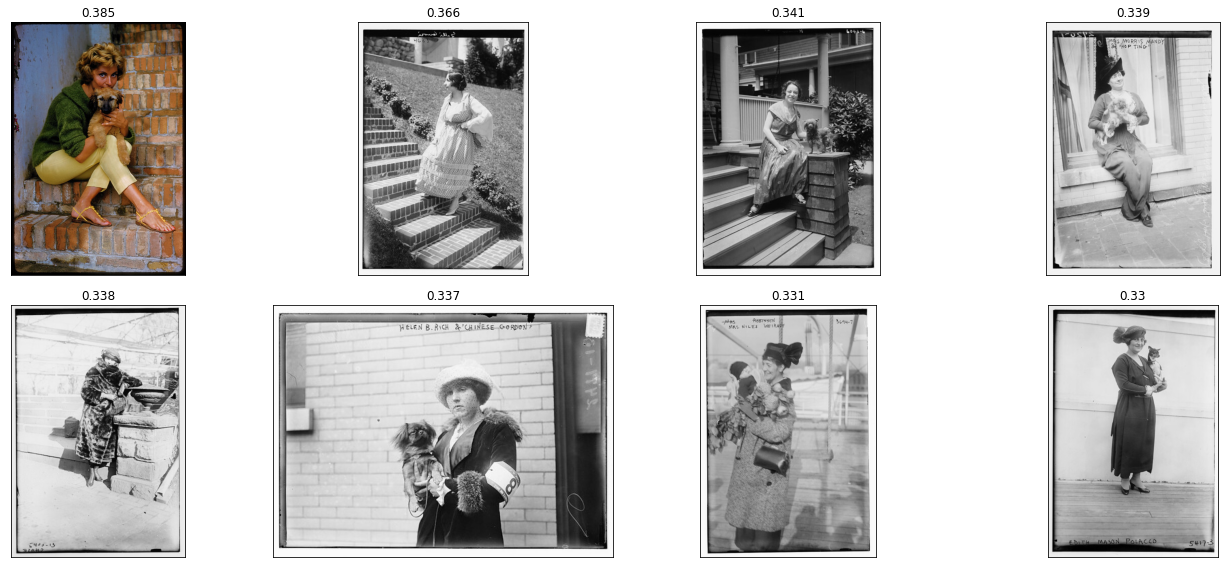

In [ ]:
import matplotlib.pyplot as plt
import skimage
from PIL import Image
import textwrap

print(search_phrase)

plt.figure(figsize=(20, 8))
i=0
for p, s in top_items_with_scores:
  image = Image.open(p).convert("RGB")
  plt.subplot(2, 4, i + 1)
  plt.imshow(image)
  plt.title(round(s, 3))
  plt.xticks([])
  plt.yticks([])
  i += 1

plt.tight_layout()

In [ ]:
print(global_urls[:3])
print(len(global_urls))

['https://live.staticflickr.com/1091/3174186405_4654a14ae4.jpg', 'https://live.staticflickr.com/1566/25073678794_25b3a07760.jpg', 'https://live.staticflickr.com/7452/12678837593_4ffcac770d.jpg']
41216


In [ ]:
image_features_np = image_features.cpu().numpy()

In [ ]:
print(image_features_np.shape)

(41216, 512)


In [ ]:
np.savez("image_features_and_urls.npz", features=image_features_np, urls=global_urls)

In [ ]:
!cp /content/image_features_and_urls.npz /content/drive/MyDrive/public/open_clip